In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [184]:
trip_data = pd.read_csv('trip_data.csv')

In [185]:
from scipy.stats import zscore
# Calculate Z-scores for the 'travel_time' column
trip_data['travel_time_zscore'] = zscore(trip_data['travel_time'])

# Set a threshold for Z-scores beyond which data points are considered outliers
zscore_threshold = 3

# Filter out rows with Z-scores greater than the threshold
filtered_trip_data_zscore = trip_data[trip_data['travel_time_zscore'] <= zscore_threshold]

# Alternatively, you can use the IQR method
Q1 = trip_data['travel_time'].quantile(0.25)
Q3 = trip_data['travel_time'].quantile(0.75)
IQR = Q3 - Q1

# Set a multiplier for IQR to identify outliers
iqr_multiplier = 1.5

# Filter out rows with values outside the IQR range
filtered_trip_data_iqr = trip_data[(trip_data['travel_time'] >= Q1 - iqr_multiplier * IQR) & (trip_data['travel_time'] <= Q3 + iqr_multiplier * IQR)]

filtered_trip_data_iqr.shape


(960, 9)

In [186]:
trip_data = filtered_trip_data_iqr

In [187]:
trip_data['SITR'] = trip_data['dwell_time'] / trip_data['travel_time']

In [188]:
trip_data.head()

,trip_id,date,start_time,end_time,start_terminal,end_terminal,travel_time,dwell_time,travel_time_zscore,SITR
0,1,2021-10-01,07:31:27,08:15:31,BT02,BT01,44.066667,5.466667,-0.325572,0.124054
1,2,2021-10-01,09:12:10,10:00:55,BT01,BT02,48.750000,2.366667,-0.226374,0.048547
2,3,2021-10-01,10:42:10,11:32:30,BT02,BT01,50.333333,9.283333,-0.192837,0.184437
3,4,2021-10-01,12:23:09,13:15:46,BT01,BT02,52.616667,9.183333,-0.144474,0.174533
6,7,2021-10-02,08:31:42,09:19:09,BT02,BT01,47.450000,7.016667,-0.253909,0.147875


In [189]:
trip_data.shape

(960, 10)

# Add more features

In [190]:
# add a new column for day of the week from the date column
# day of the week should be numbered 0-6, with 0 being Monday
trip_data['day_of_week'] = pd.to_datetime(trip_data['date']).dt.dayofweek

In [191]:
# add a new column for day of the week from the date column

trip_data['day_name'] = pd.to_datetime(trip_data['date']).dt.day_name()


# add a new column for hour of the day from the start_time column
# hour of the day should be numbered 0-23, with 0 being midnight
# also add like 0.5 for 12:30am, 1.5 for 1:30am, etc.
trip_data['hour_of_day'] = pd.to_datetime(trip_data['start_time']).dt.hour + pd.to_datetime(trip_data['start_time']).dt.minute/60

C:\Users\MSI\AppData\Local\Temp\ipykernel_18332\4228691066.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  trip_data['hour_of_day'] = pd.to_datetime(trip_data['start_time']).dt.hour + pd.to_datetime(trip_data['start_time']).dt.minute/60
C:\Users\MSI\AppData\Local\Temp\ipykernel_18332\4228691066.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  trip_data['hour_of_day'] = pd.to_datetime(trip_data['start_time']).dt.hour + pd.to_datetime(trip_data['start_time']).dt.minute/60


In [192]:
# df.drop((df['hour_of_day']<=6) | (df['hour_of_day']>=21), inplace=True)
trip_data.drop(trip_data[trip_data['hour_of_day']<=6].index, inplace=True)
trip_data.drop(trip_data[trip_data['hour_of_day']>=21].index, inplace=True)

In [193]:
# add a new column for weekend or weekday from the day_of_week column
# 0 = weekday, 1 = weekend
trip_data['weekend'] = np.where(trip_data['day_of_week'] >= 6, 1, 0)

In [194]:
# add a new column for rush hour from the hour_of_day column
# 0 = not rush hour, 1 = rush hour
trip_data['rush_hour'] = np.where((trip_data['hour_of_day'] >= 7) & (trip_data['hour_of_day'] <= 9), 1, 0)
trip_data['rush_hour'] = np.where((trip_data['hour_of_day'] >= 16) & (trip_data['hour_of_day'] <= 18), 1, trip_data['rush_hour'])
trip_data['rush_hour'] = np.where((trip_data['hour_of_day'] >= 12) & (trip_data['hour_of_day'] <= 2), 1, trip_data['rush_hour'])

In [195]:
trip_data

,trip_id,date,start_time,end_time,start_terminal,end_terminal,travel_time,dwell_time,travel_time_zscore,SITR,day_of_week,day_name,hour_of_day,weekend,rush_hour
0,1,2021-10-01,07:31:27,08:15:31,BT02,BT01,44.066667,5.466667,-0.325572,0.124054,4,Friday,7.516667,0,1
1,2,2021-10-01,09:12:10,10:00:55,BT01,BT02,48.750000,2.366667,-0.226374,0.048547,4,Friday,9.200000,0,0
2,3,2021-10-01,10:42:10,11:32:30,BT02,BT01,50.333333,9.283333,-0.192837,0.184437,4,Friday,10.700000,0,0
3,4,2021-10-01,12:23:09,13:15:46,BT01,BT02,52.616667,9.183333,-0.144474,0.174533,4,Friday,12.383333,0,0
6,7,2021-10-02,08:31:42,09:19:09,BT02,BT01,47.450000,7.016667,-0.253909,0.147875,5,Saturday,8.516667,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,1100,2022-10-31,09:30:57,10:20:13,BT01,BT02,49.266667,4.900000,-0.215430,0.099459,0,Monday,9.500000,0,0
1100,1101,2022-10-31,15:41:42,16:31:41,BT02,BT01,49.983333,4.483333,-0.200251,0.089697,0,Monday,15.683333,0,0
1101,1102,2022-10-31,17:10:56,17:56:46,BT01,BT02,45.833333,4.700000,-0.288152,0.102545,0,Monday,17.166667,0,1
1102,1103,2022-10-31,18:24:00,19:03:57,BT02,BT01,39.950000,3.216667,-0.412767,0.080517,0,Monday,18.400000,0,0


In [196]:
trip_data.to_csv('history.csv', index=False)

# visualization

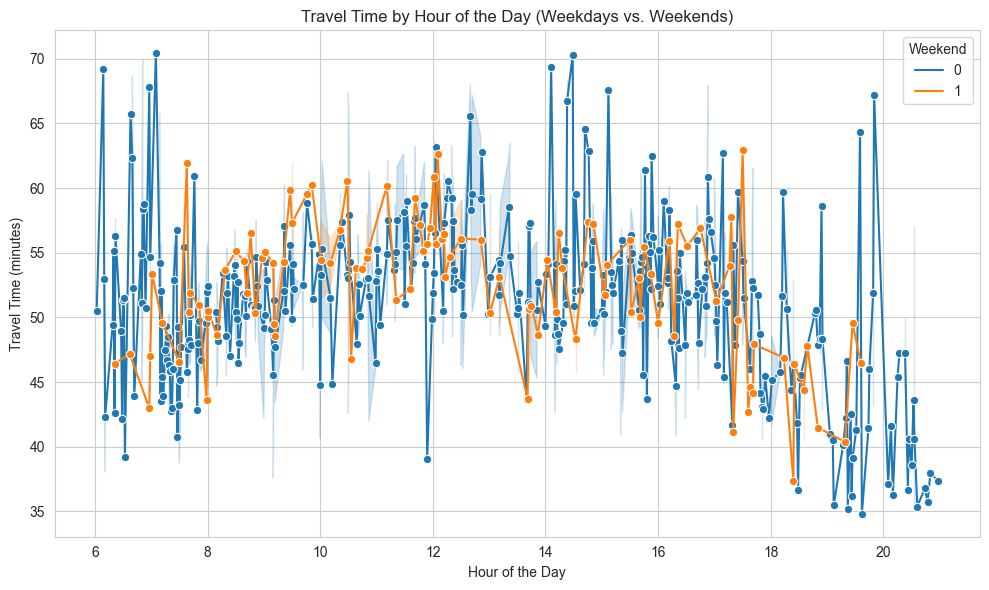

In [197]:
# Set the style of seaborn for better visualization
sns.set_style('whitegrid')

# Plot line graph with different colors for weekends and weekdays
plt.figure(figsize=(10, 6))
sns.lineplot(data=trip_data, x='hour_of_day', y='travel_time', hue='weekend', marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Travel Time (minutes)')
plt.title('Travel Time by Hour of the Day (Weekdays vs. Weekends)')
plt.legend(title='Weekend')
plt.tight_layout()
plt.show()


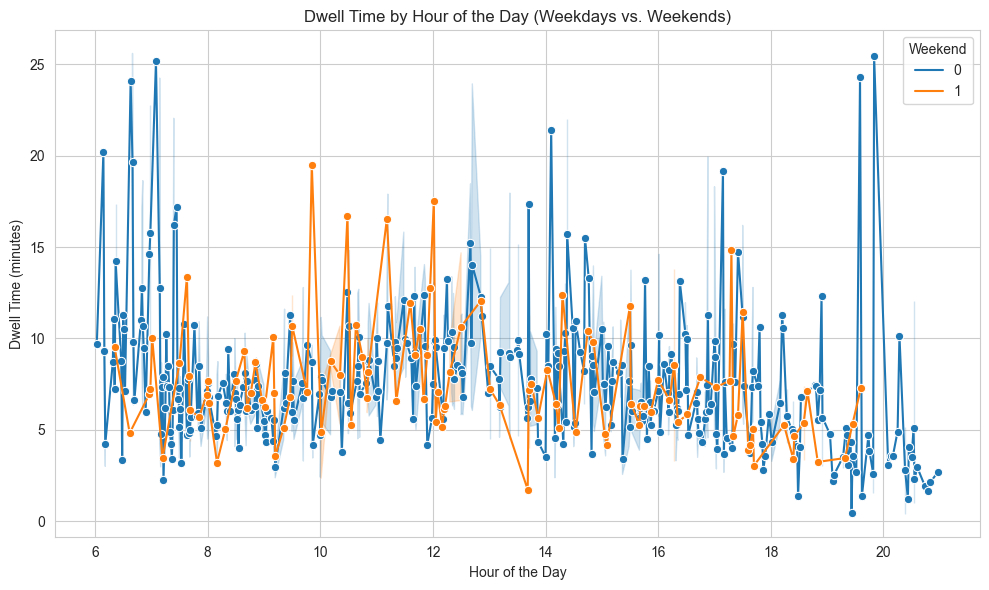

In [198]:
# Set the style of seaborn for better visualization
sns.set_style('whitegrid')

# Plot line graph with different colors for weekends and weekdays
plt.figure(figsize=(10, 6))
sns.lineplot(data=trip_data, x='hour_of_day', y='dwell_time', hue='weekend', marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Dwell Time (minutes)')
plt.title('Dwell Time by Hour of the Day (Weekdays vs. Weekends)')
plt.legend(title='Weekend')
plt.tight_layout()
plt.show()


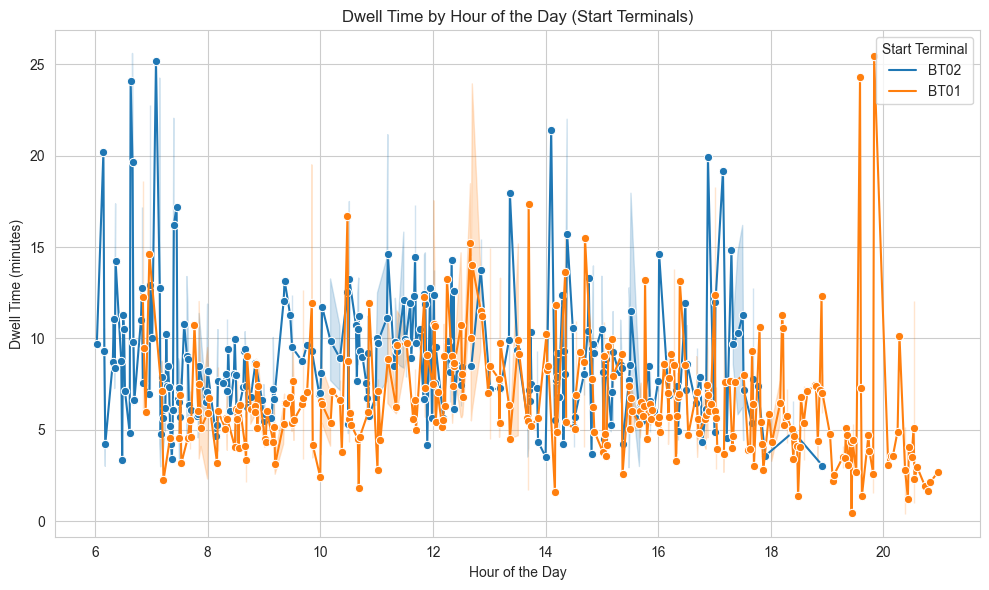

In [199]:
# Set the style of seaborn for better visualization
sns.set_style('whitegrid')

# Plot line graph with different colors for start terminals
plt.figure(figsize=(10, 6))
sns.lineplot(data=trip_data, x='hour_of_day', y='dwell_time', hue='start_terminal', marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Dwell Time (minutes)')
plt.title('Dwell Time by Hour of the Day (Start Terminals)')
plt.legend(title='Start Terminal')
plt.tight_layout()
plt.show()



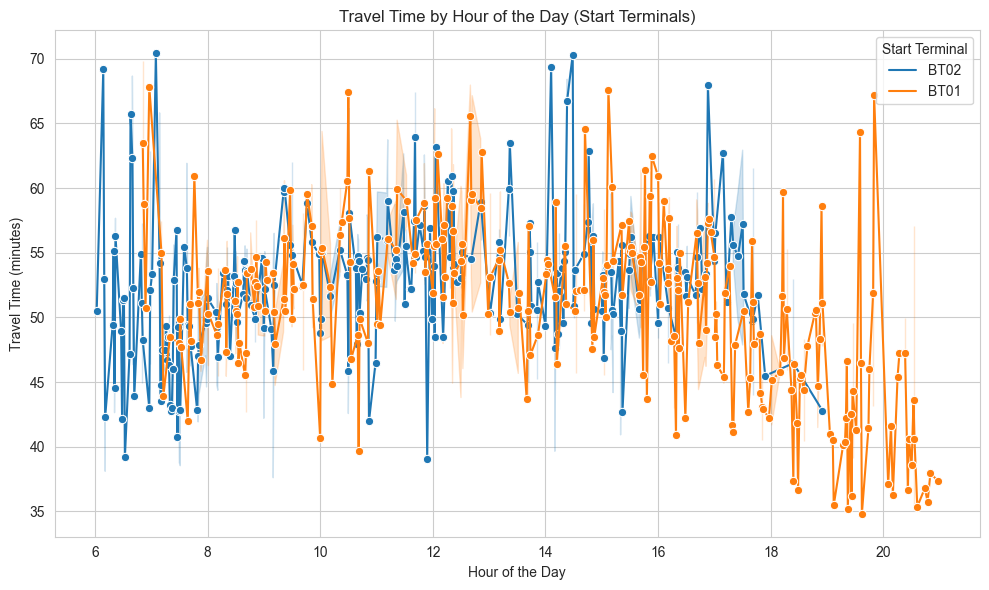

In [200]:
# Set the style of seaborn for better visualization
sns.set_style('whitegrid')

# Plot line graph with different colors for start terminals
plt.figure(figsize=(10, 6))
sns.lineplot(data=trip_data, x='hour_of_day', y='travel_time', hue='start_terminal', marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Travel Time (minutes)')
plt.title('Travel Time by Hour of the Day (Start Terminals)')
plt.legend(title='Start Terminal')
plt.tight_layout()
plt.show()

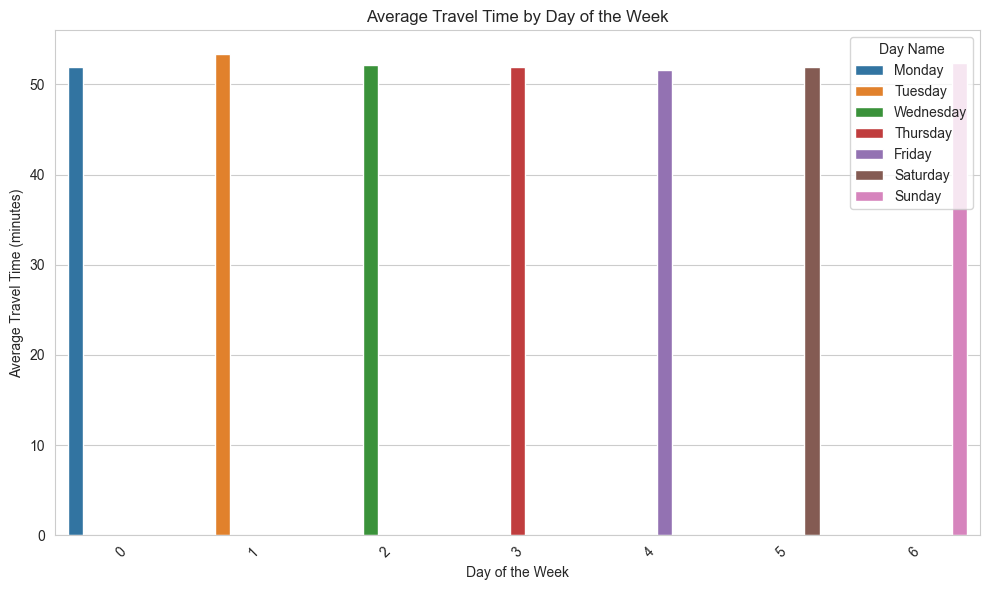

In [201]:
# Set the style of seaborn for better visualization
sns.set_style('whitegrid')

# Calculate average travel time by day of the week
avg_travel_time_by_day = trip_data.groupby(['day_of_week', 'day_name'])['travel_time'].mean().reset_index()

# Plot bar chart with different colors for each day_name
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_travel_time_by_day, x='day_of_week', y='travel_time', hue='day_name')
plt.xlabel('Day of the Week')
plt.ylabel('Average Travel Time (minutes)')
plt.title('Average Travel Time by Day of the Week')
plt.legend(title='Day Name')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

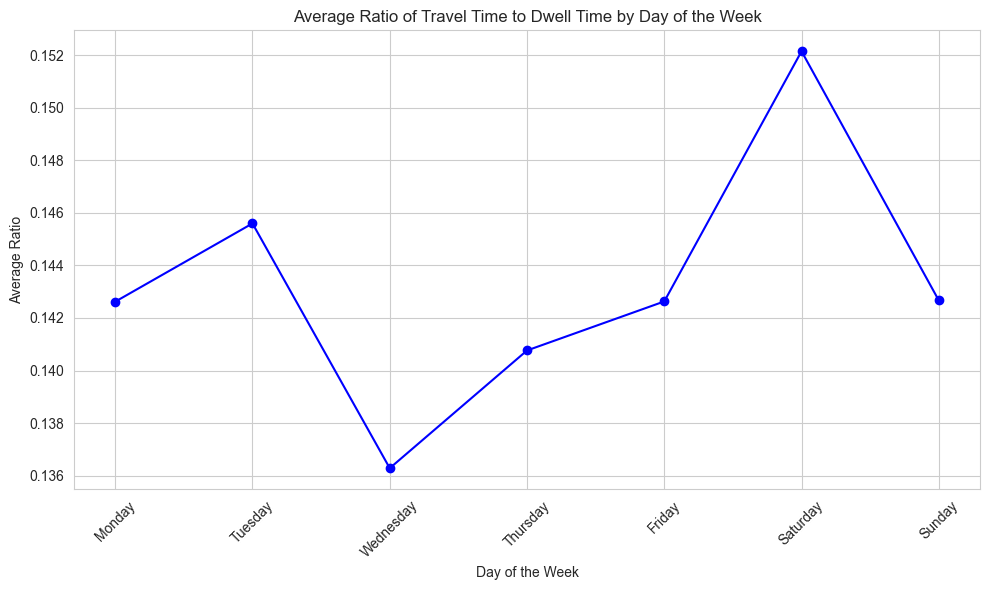

In [202]:
# Line chart showing how the ratio of travel time to dwell time varies over the days of the week.
average_ratios_by_day = trip_data.groupby('day_name')['SITR'].mean()

# List of days in the correct order for plotting
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(days_of_week, average_ratios_by_day, marker='o', color='b')
plt.title('Average Ratio of Travel Time to Dwell Time by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Ratio')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

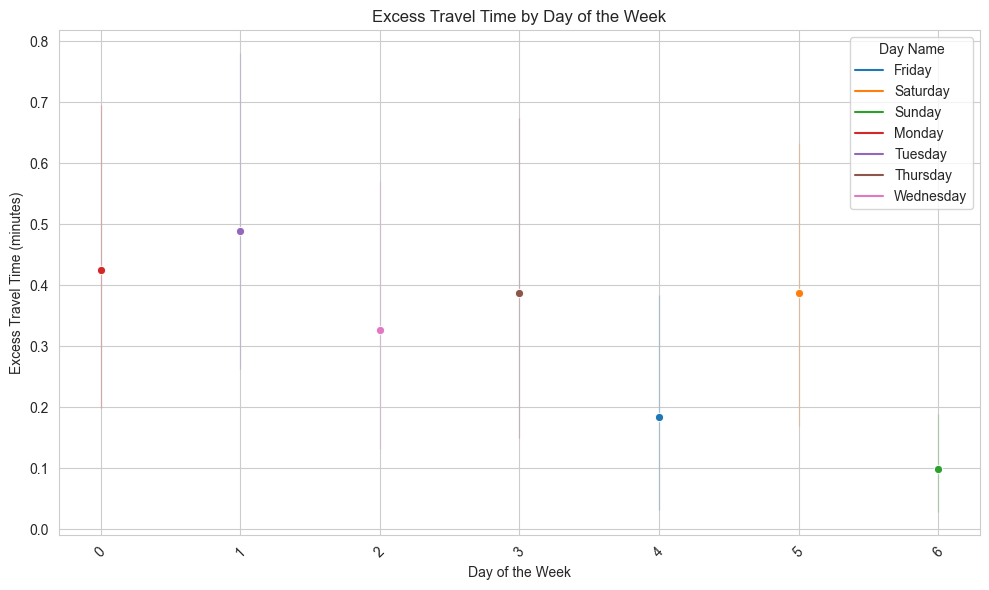

In [203]:
# calculate 90 percentage of the travel time
ninety_percentile = trip_data['travel_time'].quantile(0.9)

# find excess travel time
# if it is negative take it as 0
trip_data['excess_travel_time'] = trip_data['travel_time'] - ninety_percentile
trip_data['excess_travel_time'] = np.where(trip_data['excess_travel_time'] < 0, 0, trip_data['excess_travel_time'])

# plot the excess travel time by day of the week using area chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=trip_data, x='day_of_week', y='excess_travel_time', hue='day_name', marker='o')
plt.xlabel('Day of the Week')
plt.ylabel('Excess Travel Time (minutes)')
plt.title('Excess Travel Time by Day of the Week')
plt.legend(title='Day Name')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

